Let's assume we have 3 stocks that we can trade. We know their returns and their covariance matrix.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

cov = np.array([[2.25, 2, -1], [2, 4, -2], [-1, -2, 6.25]])
ret_asset = np.array([1, 2, 3])

Let's construct different types of portfolios based on this data. For example, if we have the following weights in the portfolio [0.5, 0.4, 0.1], then the portfolio has the the following returns and volatility

$$ R_{portfolio} = \bar{R}' \bar{w}$$

$$ vol_{portfolio} = \sqrt{ {\bar{w}' \sum \bar{w}} } $$ 

In [2]:
weights = np.array([0.5, 0.4, 0.1])

ret_p = np.dot(ret_asset, weights)
vol_p = ( np.dot(weights.T, np.dot(cov, weights)) )**0.5

print('portfolio return is', ret_p)
print('portfolio vol is', vol_p)

portfolio return is 1.6
portfolio vol is 1.3435028842544403


## Min-variance frontier

Taking different weights of these 3 stocks in our portfolio, we can construct different portfolio with different returns and volatility. But efficient min-variance frontier is the line where for a certain portfolio returns, we can see the minimum possible volatility among all possible combination of stock weights

Let's assume

* $\bar{R}$ is the vector of stock returns [1, 2, 3]

* $\bar{w}$ is the vector of stock weights in the portfolio

* $R_p$ is the portfolio return

* $\sum$ is the covariance matrix of these 3 stock returns

* $\bar{i}$ is the vector of ones

And the portfolio volatility given portfolio return is:

$$A = \bar{R}' {\sum}^{-1} \bar{R}$$

$$B = \bar{R}' {\sum}^{-1} \bar{i}$$

$$C = \bar{i}' {\sum}^{-1} \bar{i}$$

$$vol_{portfolio} = \frac{A - 2BR_p + CR_p^2}{AC - B^2} $$

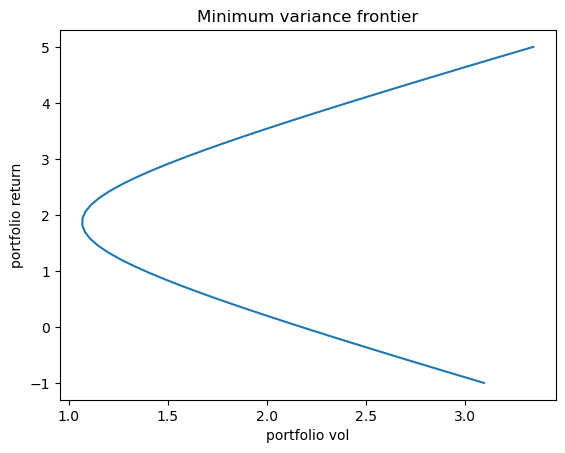

In [3]:
def vol_p_mvf_theory(ret_p, ret_asset, cov):
    # calculates minimum vol for a certain value of portfolio return
    n = ret_asset.shape[0]
    cov_inv = np.linalg.inv(cov)
    i = np.ones(n).T
    a = np.dot(np.dot(ret_asset.T, cov_inv), ret_asset)  # a number 
    b = np.dot(np.dot(ret_asset.T, cov_inv), i)  # a number 
    c = np.dot(np.dot(i.T, cov_inv), i)  # a number 
    sigma_sq = ( a - 2 * b * ret_p + c * ret_p**2 ) / (a * c - b**2)
    return sigma_sq**0.5


ret_p_mvf = np.linspace(-1, 5, 50).T  # create a graph with 50 points
vol_p_mvf = vol_p_mvf_theory(ret_p_mvf, ret_asset, cov)

plt.plot(vol_p_mvf, ret_p_mvf)
plt.title('Minimum variance frontier')
plt.ylabel('portfolio return')
plt.xlabel('portfolio vol')
plt.show()    

If we select a specific value of portfolio return (for example, 2.5), we can find minimum volatility for this specific portfolio return.

In [4]:
RET_P_SPEC = 2.5
vol_p_spec = vol_p_mvf_theory(RET_P_SPEC, ret_asset, cov)

And we can see this point on minimum variance frontier

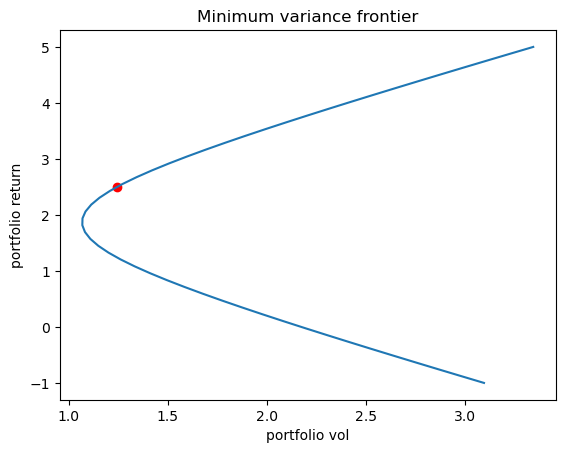

In [5]:
plt.plot(vol_p_mvf, ret_p_mvf)
plt.title('Minimum variance frontier')
plt.ylabel('portfolio return')
plt.xlabel('portfolio vol')
plt.scatter(vol_p_spec, RET_P_SPEC, color='r')  # display the return and vol for a specific value of portfolio return
plt.show()  

And we can check that these theoretical formula for stock weights provides exactly the given portfolio return

The formula for the weights of min-variance frontier portfolios given portfolio return is the following:

$$A = \bar{R}' {\sum}^{-1} \bar{R}$$

$$B = \bar{R}' {\sum}^{-1} \bar{i}$$

$$C = \bar{i}' {\sum}^{-1} \bar{i}$$

$$\bar{w} = {\sum}^{-1} \bar{i} \frac{A - R_pB}{AC-B^2} + {\sum}^{-1} \bar{R} \frac{R_pC - B}{AC-B^2}  $$

In [6]:
def weights_mvf_theory (ret_p, ret_asset, cov):
    n = ret_asset.shape[0]
    cov_inv = np.linalg.inv(cov)
    i = np.ones(n).T
    a = np.dot(np.dot(ret_asset.T, cov_inv), ret_asset)  # a number 
    b = np.dot(np.dot(ret_asset.T, cov_inv), i)  # a number 
    c = np.dot(np.dot(i.T, cov_inv), i)  # a number 
    denom = a * c - b**2
    return np.dot(cov_inv, i) * (a - ret_p * b) / denom + np.dot(cov_inv, ret_asset) * (ret_p * c - b) / denom


w_spec = weights_mvf_theory(RET_P_SPEC, ret_asset, cov)

print('portfolio weights for a given return', w_spec)
print('portfolio return (given)', RET_P_SPEC)
print('portfolio return calculated from weights', np.dot(ret_asset.T, w_spec))

portfolio weights for a given return [-0.02777778  0.55555556  0.47222222]
portfolio return (given) 2.5
portfolio return calculated from weights 2.5000000000000004


so, formula for stock weights provides exactly the given portfolio return

## Random portfolio weights

Let's assume we just take the portfolio with random weights like [0.5, 0.4, 0.1].

This portfolio has not minimum volatility for a given value of return, so this portfolio does not lie on the minimum variance frontier. Let's check it.

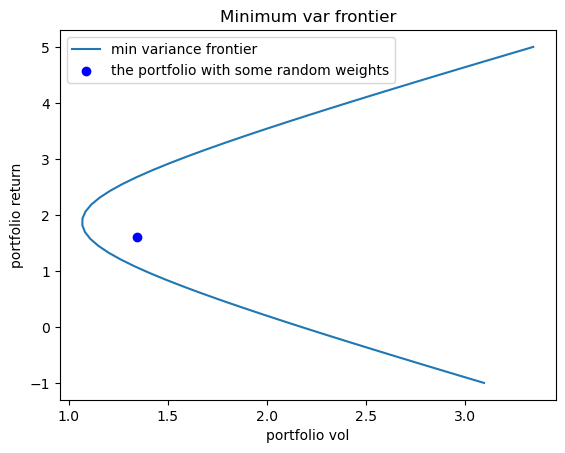

In [7]:
# weights, return and vol for our portfolio with random weights
w_random = np.array([0.5, 0.4, 0.1])
ret_p_random = np.dot(ret_asset, w_random)
vol_p_random = (np.dot(w_random, np.dot(cov, w_random.T)) )**0.5


plt.plot(vol_p_mvf, ret_p_mvf, label='min variance frontier')
plt.title('Minimum var frontier')
plt.ylabel('portfolio return')
plt.xlabel('portfolio vol')
plt.scatter(vol_p_random, ret_p_random, label='the portfolio with some random weights', color='b')
plt.legend()
plt.show()

## Global minimum variance portfolio

Weights for global-minimum-variance portfolio are the following:

$$ \bar{w} = {\sum^{-1} \bar{i} \over \bar{i'} \sum^{-1} \bar{i}} $$

Portfolio volatility is the following:

$$ vol_{portfolio} = \frac{1}{\bar{i}' \sum^{-1} \bar{i}} $$

We can see this portfolio on minimum variance frontier

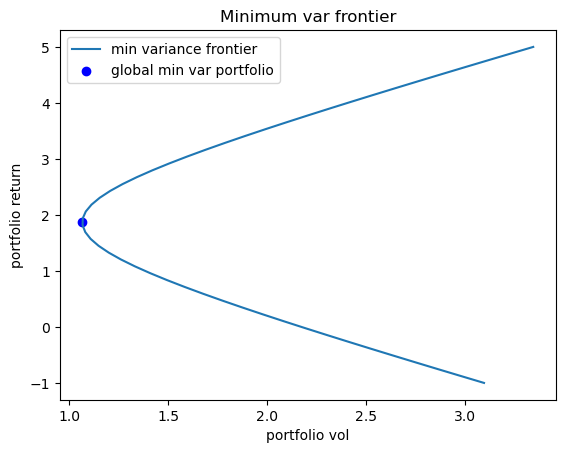

In [8]:
def global_min_var_port_weights(ret_asset, cov):
    cov_inv = np.linalg.inv(cov)
    i = np.ones_like(ret_asset).T
    num = np.dot(cov_inv, i)
    denom = np.dot(i.T, np.dot(cov_inv, i))
    return num / denom


def global_min_var_port_vol(ret_asset, cov):
    cov_inv = np.linalg.inv(cov)
    i = np.ones_like(ret_asset).T
    return ( 1 / np.dot(i.T, np.dot(cov_inv, i)) )**0.5


gmvp_w = global_min_var_port_weights(ret_asset, cov)
gmvp_ret = np.dot(gmvp_w, ret_asset)
gmvp_vol = global_min_var_port_vol(ret_asset, cov)

N_POINTS = 50  # number of points in the graph
ret_p = np.linspace(-1, 5, N_POINTS).T
vol_p = vol_p_mvf_theory(ret_p, ret_asset, cov)

plt.plot(vol_p, ret_p, label='min variance frontier')
plt.title('Minimum var frontier')
plt.ylabel('portfolio return')
plt.xlabel('portfolio vol')
plt.scatter(gmvp_vol, gmvp_ret, label='global min var portfolio', color='b')
plt.legend()
plt.show()

## Tangency portfolio and Capital Allocation Line

When there is risk-free rate asset, we can calculate Sharpe Ratio (SR) as:

$$SR = \frac{R_{portfolio} - R_{free}}{vol_{portfolio}} $$

Tangency portfolio is the portfolio which consists of only risky assets (in our case, only 3 stocks) and which has a maximum SR.

Capital Allocation Line (CAL) displays the dependence between portfolio return and portfolio volatility of certain type of portfolios. This certain type of portfolio is a portfolio which consists of not only risky assets (as we considered above all the time) but also risk-free asset.

Capital Allocation line goes through risk-free asset (return=risk-free rate return; vol=0) and the tangency portfolio (consisted of only 3 risky assets).

Having calculated weights of the portfolio, we can find tangency portfolio return and vol:

$$ \bar{w}_{tang\_port} = \frac{ \sum^{-1} (\bar{R} - \bar{i} R_f) }{ \bar{i}' \sum^{-1} (\bar{R} - \bar{i} R_f)  } $$

$$ R_{tang\_port} = \bar{R}' \bar{w}_{tang\_port}$$

$$ vol_{tang\_port} = \sqrt{ {\bar{w}_{tang\_port}' \sum \bar{w}_{tang\_port}} } $$ 

Assume risk-free rate is 1%

We can construct minimum variance frontier, tangency portfolio, risk-free rate and CAL on the same graph

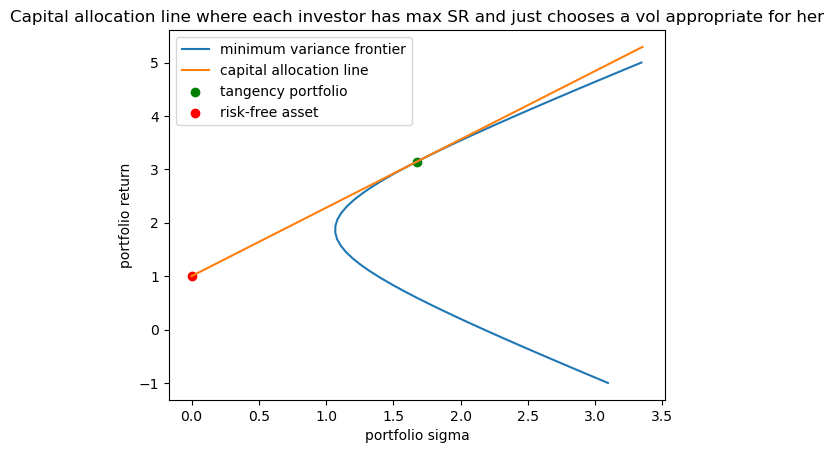

In [14]:
RF = 1  # risk-free rate


def tang_port_ret_and_vol (ret_asset, cov):
    n = ret_asset.shape[0]
    cov_inv = np.linalg.inv(cov)
    i = np.ones(n).T
    r_minus_irf = ret_asset - i * RF

    num = np.dot(cov_inv, r_minus_irf)
    denom = np.dot( np.dot(i.T, cov_inv), r_minus_irf)
    w_tang = num / denom
    ret_tang = np.dot(ret_asset.T, w_tang)
    e = np.dot( np.dot(r_minus_irf.T, cov_inv), r_minus_irf)
    sigma_tang = (ret_tang - RF) / e**0.5
    return ret_tang, sigma_tang


ret_p_tang, vol_p_tang = tang_port_ret_and_vol(ret_asset, cov)

plt.plot(vol_p_mvf, ret_p_mvf, label='minimum variance frontier')
plt.title('Capital allocation line where each investor has max SR and just chooses a vol appropriate for her')
plt.ylabel('portfolio return')
plt.xlabel('portfolio sigma')
plt.plot(np.array([0, vol_p_tang + vol_p_tang]), np.array([RF, ret_p_tang + (ret_p_tang- RF)]), label='capital allocation line')
plt.scatter(vol_p_tang, ret_p_tang, c='g', label='tangency portfolio')
plt.scatter(0, RF, c='r', label='risk-free asset')
plt.legend()
plt.show()